In [315]:
import numpy as np
import pandas as pd
import plotly.express as px

In [316]:
data = pd.read_csv("archive/Environment_Temperature_change_E_All_Data_NOFLAG.csv")

In [317]:
data.head(10)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,�C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,�C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,�C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,�C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,�C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
5,2,Afghanistan,7003,March,6078,Standard Deviation,�C,1.512,1.512,1.512,...,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512
6,2,Afghanistan,7004,April,7271,Temperature change,�C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
7,2,Afghanistan,7004,April,6078,Standard Deviation,�C,1.406,1.406,1.406,...,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406,1.406
8,2,Afghanistan,7005,May,7271,Temperature change,�C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
9,2,Afghanistan,7005,May,6078,Standard Deviation,�C,1.230,1.230,1.230,...,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230,1.230


In [318]:
def preprocess_data(df):
    df = df.copy()
    df = df.query("Element == 'Temperature change'")
    df_grouped = df.groupby("Area").mean()
    df_grouped.reset_index()
    df_grouped.drop(df_grouped.columns[[0,1,2]], inplace=True, axis=1)
    df_grouped.rename(columns=lambda x: x[1:], inplace=True)

    return df_grouped
    


In [319]:
updated_data = preprocess_data(data)
updated_data.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.027941,-0.197471,0.888706,-0.905647,-0.051824,0.222118,-0.362176,-0.349294,-0.377882,0.729941,...,1.499235,1.246118,0.179765,1.251706,0.487000,1.098294,1.671882,1.306765,1.574706,0.899588
Africa,-0.089000,-0.006353,0.077471,-0.189471,-0.195294,0.146706,-0.222588,-0.181647,0.350294,0.184000,...,1.518059,0.892941,0.814941,1.002353,1.049176,1.207941,1.483941,1.188647,1.236059,1.428000
Albania,0.473235,0.238941,0.254647,-0.197118,-0.361588,0.460294,-0.078353,0.060765,-0.037765,-0.076235,...,1.208706,1.137765,1.513235,1.541706,1.466529,1.689471,1.616000,1.416529,2.206412,2.029000
Algeria,0.302059,0.029706,0.176824,0.056529,-0.062353,0.320412,-0.072647,0.038000,0.183000,0.139824,...,2.334000,1.354294,1.258824,1.224412,1.772529,1.285235,1.910765,1.518588,1.404353,1.289529
American Samoa,-0.028941,-0.106000,0.096471,-0.275529,-0.413412,0.133294,-0.372353,-0.150471,0.092235,-0.112118,...,1.089353,0.854600,0.938667,1.166867,1.084923,0.841538,1.564846,1.271000,1.119615,1.465923


In [320]:
#Enter updated_data dataframe into function, then the name of the country you are querying
def query_country(df, name):
    df2 = df.query(f"Area == '{name}'")
    df2 = df2.T
    df2 = df2.rename_axis("Year")
    return df2

In [321]:
brazil_stats = query_country(updated_data,"Brazil")
brazil_stats.head()


Area,Brazil
Year,
1961,0.154824
1962,-0.176706
1963,0.157824
1964,-0.268824
1965,-0.028059


<AxesSubplot:xlabel='Year'>

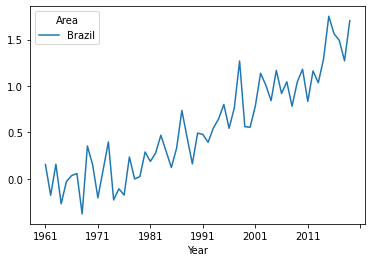

In [322]:
brazil_stats.plot()